# Figures for Fig.9

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from funcs.utils import *

In [2]:
N = 10000
params = [[0.3, 1.0], [0.9, 0.5]] #(g, \sigma_n)
sigma_s_tilde = 1.

In [3]:
# simulation
mcs = np.load("data/mcscaling_linear.npy")
trial = np.shape(mcs)[1]
max_leadout = np.shape(mcs)[2]

In [4]:
# theory
mc_theory_list = []
threshold_list = []
K_list = []
r_list = []
alpha = np.arange(0.0, 1.01, 0.01)

for [g, sigma_n] in params:
    K = sigma_n**2/(1-g**2)
    K_list.append(K)
    
    A = alpha*(sigma_s_tilde**2)/K
    B = g**2
    
    mc_theory = np.zeros(len(alpha))
    for m in range(1,100):
        mc_theory += (-1)**(m-1) * (A**m) / (1-B**m)
        
    mc_theory_list.append(mc_theory)
    
    threshold = (K/np.sqrt((K-sigma_n**2)**2+sigma_s_tilde**4)) * np.sqrt(1-B**2)
    threshold_list.append(threshold)
    
    denominator = alpha*(sigma_s_tilde**2/K)/(1-B)
    r = mc_theory/(denominator+ 1e-7)
    r_list.append(r[1:])

## Figure 9(a)

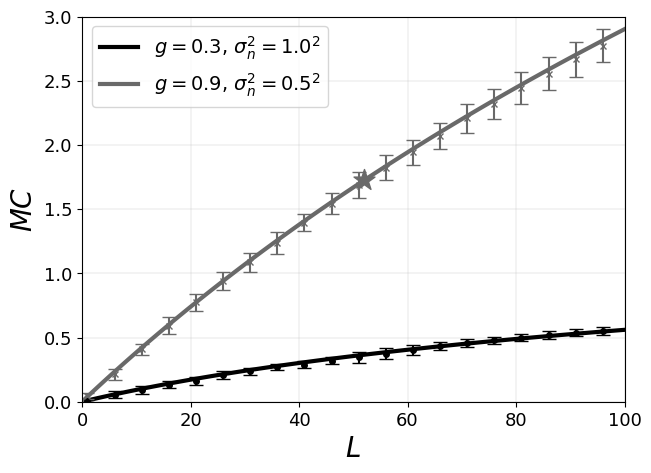

In [5]:
fig = plt.figure(figsize=(7,5))
markers =["o", "x", "D", "s"]
colors = ["black", "dimgray", "darkgray"]

i=0
for [g, sigma_n] ,mc_theory, threshold in zip(params, mc_theory_list, threshold_list):
    mc_mean = np.mean(mcs[i], axis=0)
    mc_std = np.std(mcs[i], axis=0)
    plt.errorbar(np.arange(1,max_leadout+1,5), mc_mean[::5], mc_std[::5], marker=markers[i], color=colors[i],markersize=4,linestyle="", capsize=5)
    
    threshold_L = int(threshold*np.sqrt(N))
    plt.plot(alpha*np.sqrt(N), mc_theory, color=colors[i], linewidth=3, label=r"$g=$"+f"{g}, " + r"$\sigma_n^2=$"+f"{sigma_n}"+r"$^2$")
    if threshold_L<max_leadout:
        plt.scatter(threshold_L, mc_theory[threshold_L], marker="*", color=colors[i], s=250)
    i += 1
plt.xlabel(r"$L$",fontsize=20)
plt.ylabel(r"$MC$",fontsize=20)
plt.tick_params(labelsize=13)
plt.xlim(0,100)
plt.ylim(0,3)
plt.legend(fontsize=14)
plt.grid(linewidth=0.2)
plt.show()

## Figure 9(b)

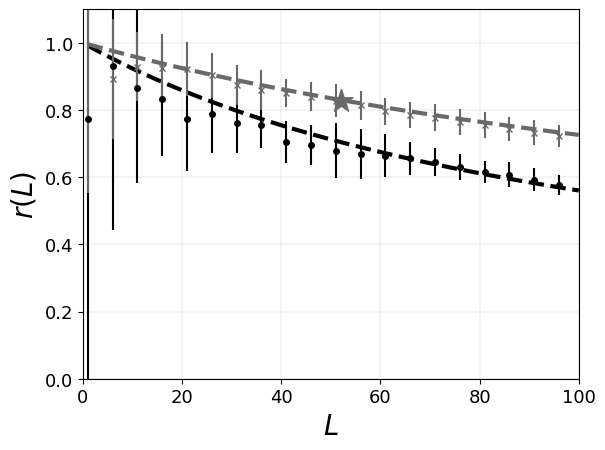

In [16]:
i=0
for [g, sigma_n] ,mc_theory, threshold, K, r in zip(params, mc_theory_list, threshold_list, K_list, r_list):
    """theory
    """
    plt.plot(alpha[1:]*np.sqrt(N), r, color=colors[i], linewidth=3, linestyle="--")
    
    threshold_L = int(threshold*np.sqrt(N))
    if threshold_L < max_leadout:
        plt.scatter(threshold_L, r[threshold_L], marker="*", color=colors[i], s=300)
    
    """simulation
    """
    mc_mean = np.mean(mcs[i], axis=0)
    mc_std = np.std(mcs[i], axis=0)
    B = g**2 
    plt.errorbar(np.arange(1, max_leadout+1, 5), np.sqrt(N)*mc_mean[0::5]/(((sigma_s_tilde**2/K)/(1-B))*np.arange(1,max_leadout+1,5)), \
        np.sqrt(N)*mc_std[0::5]/(((sigma_s_tilde**2/K)/(1-B))*np.arange(1,max_leadout+1,5)), color=colors[i], marker=markers[i], linestyle="", markersize=4)
    
    i += 1
    
plt.xlabel(r"$L$",fontsize=20)
plt.ylabel(r"$r(L)$",fontsize=20)
plt.tick_params(labelsize=13)
plt.xlim(0,100)
plt.ylim(0.,1.1)    
#plt.legend(fontsize=14)
plt.grid(linewidth=0.2)
plt.show()